<a href="https://colab.research.google.com/github/athiniotim/Final_Essay_Forest_Fires/blob/main/forest_fires_tovima_sentiment_analysis_Michaela_Athinioti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 7.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
forest_fires_tovima_df= pd.read_csv("/content/gdrive/MyDrive/Final Essay ΕΔΔΕ.2 Αθηνιώτη Μιχαέλα/clean csv/forest_fires_tovima_articles_csv.csv")

In [ ]:
len(forest_fires_tovima_df)

73

In [ ]:
forest_fires_tovima_df

,article_url,title,date,time,section,author,excert,text_body,feat_img_link,feat_img_caption
0,https://www.tovima.gr/2025/04/16/society/agrot...,Αγροτοδασική φωτιά στη Φθιώτιδα – Μεγάλη κινητ...,16-04-2025,14:51,Κοινωνία,Newsroom,Κοντά σε πευκόφυτη περιοχή στον Λόγγο του Αγίο...,Σε συναγερμό έχουν τεθεί οι πυροσβεστικές δυνά...,https://www.tovima.gr/wp-content/uploads/2024/...,Κοντά σε πευκόφυτη περιοχή στον Λόγγο του Αγίο...
1,https://www.tovima.gr/2025/04/27/society/kefal...,Κεφαλλονιά: Φωτιά σε δασική έκταση στη περιοχή...,27-04-2025,15:02,Κοινωνία,Newsroom,Για την κατάσβεση της φωτιάς στην Κεφαλλονιά ε...,Την κινητοποίηση της Πυροσβεστικής προκάλεσε φ...,https://www.tovima.gr/wp-content/uploads/2025/...,Για την κατάσβεση της φωτιάς στην Κεφαλλονιά ε...
2,https://www.tovima.gr/2025/03/13/society/fotia...,Φωτιά σε αγροτοδασική έκταση στα Χανιά – Μήνυμ...,13-03-2025,08:23,Κοινωνία,Newsroom,Για την κατάσβεση της φωτιά στα Χανιά επιχειρο...,Την κινητοποίηση της πυροσβεστικής προκάλεσε π...,https://www.tovima.gr/wp-content/uploads/2024/...,Για την κατάσβεση της φωτιά στα Χανιά επιχειρο...
3,https://www.tovima.gr/2024/09/28/society/ksant...,Ξάνθη: Φωτιά σε δασική έκταση – Επιχειρούν ενά...,28-09-2024,16:08,Κοινωνία,Newsroom,Μάχη με τις φλόγες της φωτιάς σε δασική έκταση...,"Φωτιά ξέσπασε σε δασική έκταση στην Ξάνθη, κιν...",https://www.tovima.gr/wp-content/uploads/2024/...,Μάχη με τις φλόγες της φωτιάς σε δασική έκταση...
4,https://www.tovima.gr/2024/09/01/society/fotia...,Φωτιά τώρα στη Φθιώτιδα – Καίγεται δασική έκταση,01-09-2024,18:12,Κοινωνία,Newsroom,Φωτιά τώρα ξέσπασε στη Φθιώτιδα - Καίγεται δασ...,"Φωτιά τώρα ξέσπασε στη Φθιώτιδα, στην περιοχή ...",https://www.tovima.gr/wp-content/uploads/2024/...,Φωτιά τώρα ξέσπασε στη Φθιώτιδα - Καίγεται δασ...
...,...,...,...,...,...,...,...,...,...,...
68,https://www.tovima.gr/2023/07/06/society/pyrka...,Πυρκαγιά σε δασική έκταση στο Μαρκόπουλο Ωρωπού,06-07-2023,14:32,Κοινωνία,Newsroom,Για την κατάσβεση της φωτιάς επιχειρούν μέχρι ...,Πυρκαγιά έχει ξεσπάσει σε δασική έκταση στο Μα...,https://www.tovima.gr/wp-content/uploads/2023/...,Για την κατάσβεση της φωτιάς επιχειρούν μέχρι ...
69,https://www.tovima.gr/2023/05/29/world/kanadas...,Καναδάς: Περίπου 18.000 άνθρωποι εγκατέλειψαν ...,29-05-2023,23:17,Κόσμος,Newsroom,Ο πρωθυπουργός του Καναδά Τζάστιν Τριντό υπογρ...,Χιλιάδες άνθρωποι υποχρεώθηκαν να εγκαταλείψου...,https://www.tovima.gr/wp-content/uploads/2023/...,Ο πρωθυπουργός του Καναδά Τζάστιν Τριντό υπογρ...
70,https://www.tovima.gr/2023/05/27/society/pyrka...,Πυρκαγιά σε αγροτοδασική έκταση στα Καλύβια Θο...,27-05-2023,18:19,Κοινωνία,Newsroom,Διακοπή της κυκλοφορίας στη λεωφόρο Αναβύσσου ...,Πυρκαγιά έχει ξεσπάσει σε αγροτοδασική έκταση ...,https://www.tovima.gr/wp-content/uploads/2023/...,Διακοπή της κυκλοφορίας στη λεωφόρο Αναβύσσου ...
71,https://www.tovima.gr/2023/05/14/society/rodos...,Ρόδος: Πυρκαγιά κοντά σε δασική έκταση,14-05-2023,16:03,Κοινωνία,Newsroom,Επί ποδός η πυροσβεστική στη Ρόδο μετά από φωτ...,Μεγάλη κινητοποίηση των πυροσβεστικών δυνάμεων...,https://www.tovima.gr/wp-content/uploads/2023/...,Επί ποδός η πυροσβεστική στη Ρόδο μετά από φωτ...


In [ ]:
forest_fires_tovima_df['date_dt'] = pd.to_datetime(forest_fires_tovima_df['date'], format='%d-%m-%Y')
forest_fires_tovima_df['time_dt'] = pd.to_datetime(forest_fires_tovima_df['time'], format='%H:%M')
forest_fires_tovima_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excert,object
text_body,object
feat_img_link,object
feat_img_caption,object


In [ ]:
sa_forest_fires_tovima_df = forest_fires_tovima_df[(forest_fires_tovima_df['date_dt'] >= '2023-01-01') & (forest_fires_tovima_df['date_dt'] <= '2024-12-31')].reset_index()

In [ ]:
sa_forest_fires_tovima_df.head(5)

,index,article_url,title,date,time,section,author,excert,text_body,feat_img_link,feat_img_caption,date_dt,time_dt
0,3,https://www.tovima.gr/2024/09/28/society/ksant...,Ξάνθη: Φωτιά σε δασική έκταση – Επιχειρούν ενά...,28-09-2024,16:08,Κοινωνία,Newsroom,Μάχη με τις φλόγες της φωτιάς σε δασική έκταση...,"Φωτιά ξέσπασε σε δασική έκταση στην Ξάνθη, κιν...",https://www.tovima.gr/wp-content/uploads/2024/...,Μάχη με τις φλόγες της φωτιάς σε δασική έκταση...,2024-09-28,1900-01-01 16:08:00
1,4,https://www.tovima.gr/2024/09/01/society/fotia...,Φωτιά τώρα στη Φθιώτιδα – Καίγεται δασική έκταση,01-09-2024,18:12,Κοινωνία,Newsroom,Φωτιά τώρα ξέσπασε στη Φθιώτιδα - Καίγεται δασ...,"Φωτιά τώρα ξέσπασε στη Φθιώτιδα, στην περιοχή ...",https://www.tovima.gr/wp-content/uploads/2024/...,Φωτιά τώρα ξέσπασε στη Φθιώτιδα - Καίγεται δασ...,2024-09-01,1900-01-01 18:12:00
2,5,https://www.tovima.gr/2024/08/18/society/fotia...,Φωτιά σε δασική έκταση στην περιοχή Σπαθάρης Α...,18-08-2024,17:08,Κοινωνία,Newsroom,Για την κατάσβεση της φωτιάς επιχειρούν 34 πυρ...,Την κινητοποίηση της Πυροσβεστικής προκάλεσε φ...,https://www.tovima.gr/wp-content/uploads/2024/...,Για την κατάσβεση της φωτιάς επιχειρούν 34 πυρ...,2024-08-18,1900-01-01 17:08:00
3,6,https://www.tovima.gr/2024/07/18/society/fotia...,Φωτιά στη Δράμα – Καίει δασική περιοχή,18-07-2024,11:49,Κοινωνία,Newsroom,Στο σημείο βρίσκονται ισχυρές δυνάμεις της πυρ...,Φωτιά ξέσπασε το πρωί της Πέμπτης σε ορεινή δύ...,https://www.tovima.gr/wp-content/uploads/2024/...,Στο σημείο βρίσκονται ισχυρές δυνάμεις της πυρ...,2024-07-18,1900-01-01 11:49:00
4,7,https://www.tovima.gr/2024/07/15/society/fotia...,Φωτιά σε δασική έκταση στα Ιωάννινα,15-07-2024,16:25,Κοινωνία,Newsroom,Η φωτιά προκλήθηκε υπό αδιευκρίνιστες μέχρι στ...,Φωτιά σε δασική έκταση στα Ιωάννινα βρίσκεται ...,https://www.tovima.gr/wp-content/uploads/2024/...,Η φωτιά προκλήθηκε υπό αδιευκρίνιστες μέχρι στ...,2024-07-15,1900-01-01 16:25:00


In [ ]:
len(sa_forest_fires_tovima_df)

67

In [ ]:
sa_forest_fires_tovima_df.loc[:, 'full_text'] = (
    sa_forest_fires_tovima_df['title'].fillna('') +
    ' ' +
    sa_forest_fires_tovima_df['excert'].fillna('') +
    ' ' +
    sa_forest_fires_tovima_df['text_body'].fillna('')
)

In [ ]:
short_sa_forest_fires_tovima_df = sa_forest_fires_tovima_df[['date_dt', "time_dt",'full_text' ]]
short_sa_forest_fires_tovima_df = short_sa_forest_fires_tovima_df.rename(columns={'full_text': 'text'} )
short_sa_forest_fires_tovima_df['time_dt'] = short_sa_forest_fires_tovima_df['time_dt'].dt.strftime('%H:%M:%S')

In [ ]:
len(short_sa_forest_fires_tovima_df)

67

In [ ]:
short_sa_forest_fires_tovima_df.head()

,date_dt,time_dt,text
0,2024-09-28,16:08:00,Ξάνθη: Φωτιά σε δασική έκταση – Επιχειρούν ενά...
1,2024-09-01,18:12:00,Φωτιά τώρα στη Φθιώτιδα – Καίγεται δασική έκτα...
2,2024-08-18,17:08:00,Φωτιά σε δασική έκταση στην περιοχή Σπαθάρης Α...
3,2024-07-18,11:49:00,Φωτιά στη Δράμα – Καίει δασική περιοχή Στο σημ...
4,2024-07-15,16:25:00,Φωτιά σε δασική έκταση στα Ιωάννινα Η φωτιά πρ...


In [ ]:
short_sa_forest_fires_tovima_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object


In [ ]:
short_sa_forest_fires_tovima_df['datetime'] = pd.to_datetime(
    short_sa_forest_fires_tovima_df['date_dt'].astype(str) + ' ' + short_sa_forest_fires_tovima_df['time_dt'],
    errors='coerce'
)

In [ ]:
short_sa_forest_fires_tovima_df['datetime'] = pd.to_datetime(short_sa_forest_fires_tovima_df['datetime'], format='%Y-%m-%d %H:%M')

In [ ]:
short_sa_forest_fires_tovima_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object
datetime,datetime64[ns]


In [ ]:
short_sa_forest_fires_tovima_df['text'] = short_sa_forest_fires_tovima_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
short_sa_forest_fires_tovima_df.head()

,date_dt,time_dt,text,datetime
0,2024-09-28,16:08:00,Ξάνθη: Φωτιά σε δασική έκταση – Επιχειρούν ενά...,2024-09-28 16:08:00
1,2024-09-01,18:12:00,Φωτιά τώρα στη Φθιώτιδα – Καίγεται δασική έκτα...,2024-09-01 18:12:00
2,2024-08-18,17:08:00,Φωτιά σε δασική έκταση στην περιοχή Σπαθάρης Α...,2024-08-18 17:08:00
3,2024-07-18,11:49:00,Φωτιά στη Δράμα – Καίει δασική περιοχή Στο σημ...,2024-07-18 11:49:00
4,2024-07-15,16:25:00,Φωτιά σε δασική έκταση στα Ιωάννινα Η φωτιά πρ...,2024-07-15 16:25:00


In [ ]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_sa_forest_fires_tovima_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(67, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

,word
8,αμην
15,γαμηλιο ταξιδι
24,διευθυντρια σχολειου
38,επικοινωνω
45,εκκλησια
...,...
13039,αληθης
13075,αναμφιβολως
13079,ανυπερβατος
13113,αναθηματικος


In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].sum(axis=1)

,0
0,6
1,11
2,6
3,0
4,0
...,...
62,0
63,9
64,1
65,0


In [ ]:
short_sa_forest_fires_tovima_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_sa_forest_fires_tovima_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_sa_forest_fires_tovima_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_sa_forest_fires_tovima_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_sa_forest_fires_tovima_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_sa_forest_fires_tovima_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_sa_forest_fires_tovima_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_sa_forest_fires_tovima_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_sa_forest_fires_tovima_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_sa_forest_fires_tovima_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_sa_forest_fires_tovima_df

,date_dt,time_dt,text,datetime,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-09-28,16:08:00,Ξάνθη: Φωτιά σε δασική έκταση – Επιχειρούν ενά...,2024-09-28 16:08:00,3,0,0,0,0,6,0,0,9,10
1,2024-09-01,18:12:00,Φωτιά τώρα στη Φθιώτιδα – Καίγεται δασική έκτα...,2024-09-01 18:12:00,3,2,0,0,0,11,2,0,12,10
2,2024-08-18,17:08:00,Φωτιά σε δασική έκταση στην περιοχή Σπαθάρης Α...,2024-08-18 17:08:00,0,0,0,0,0,6,0,0,6,6
3,2024-07-18,11:49:00,Φωτιά στη Δράμα – Καίει δασική περιοχή Στο σημ...,2024-07-18 11:49:00,0,0,0,0,0,0,2,0,0,3
4,2024-07-15,16:25:00,Φωτιά σε δασική έκταση στα Ιωάννινα Η φωτιά πρ...,2024-07-15 16:25:00,0,10,3,0,3,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2023-07-06,14:32:00,Πυρκαγιά σε δασική έκταση στο Μαρκόπουλο Ωρωπο...,2023-07-06 14:32:00,0,1,0,1,0,0,0,0,0,4
63,2023-05-29,23:17:00,Καναδάς: Περίπου 18.000 άνθρωποι εγκατέλειψαν ...,2023-05-29 23:17:00,9,18,0,1,16,9,0,10,30,12
64,2023-05-27,18:19:00,Πυρκαγιά σε αγροτοδασική έκταση στα Καλύβια Θο...,2023-05-27 18:19:00,0,4,0,5,0,1,2,0,0,5
65,2023-05-14,16:03:00,Ρόδος: Πυρκαγιά κοντά σε δασική έκταση Επί ποδ...,2023-05-14 16:03:00,7,12,0,0,0,0,7,7,10,22


**Κάνουμε index τη στήλη `date`**

In [ ]:
short_sa_forest_fires_tovima_df.reset_index(inplace=True)
short_sa_forest_fires_tovima_df.set_index('datetime', inplace=True)
short_sa_forest_fires_tovima_df

,index,date_dt,time_dt,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,
2024-09-28 16:08:00,0,2024-09-28,16:08:00,Ξάνθη: Φωτιά σε δασική έκταση – Επιχειρούν ενά...,3,0,0,0,0,6,0,0,9,10
2024-09-01 18:12:00,1,2024-09-01,18:12:00,Φωτιά τώρα στη Φθιώτιδα – Καίγεται δασική έκτα...,3,2,0,0,0,11,2,0,12,10
2024-08-18 17:08:00,2,2024-08-18,17:08:00,Φωτιά σε δασική έκταση στην περιοχή Σπαθάρης Α...,0,0,0,0,0,6,0,0,6,6
2024-07-18 11:49:00,3,2024-07-18,11:49:00,Φωτιά στη Δράμα – Καίει δασική περιοχή Στο σημ...,0,0,0,0,0,0,2,0,0,3
2024-07-15 16:25:00,4,2024-07-15,16:25:00,Φωτιά σε δασική έκταση στα Ιωάννινα Η φωτιά πρ...,0,10,3,0,3,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 14:32:00,62,2023-07-06,14:32:00,Πυρκαγιά σε δασική έκταση στο Μαρκόπουλο Ωρωπο...,0,1,0,1,0,0,0,0,0,4
2023-05-29 23:17:00,63,2023-05-29,23:17:00,Καναδάς: Περίπου 18.000 άνθρωποι εγκατέλειψαν ...,9,18,0,1,16,9,0,10,30,12
2023-05-27 18:19:00,64,2023-05-27,18:19:00,Πυρκαγιά σε αγροτοδασική έκταση στα Καλύβια Θο...,0,4,0,5,0,1,2,0,0,5


<Axes: xlabel='datetime'>

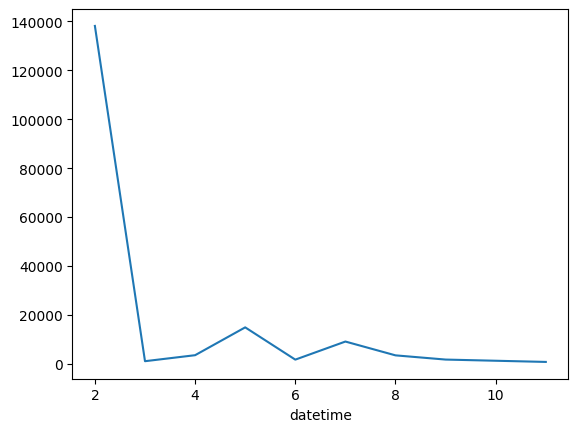

In [ ]:
short_sa_forest_fires_tovima_df['text'].str.len().groupby(by=short_sa_forest_fires_tovima_df.index.month).mean().plot()

<ipython-input-55-776688987>:1: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_sa_forest_fires_tovima_df['text'].str.len().resample('Me').mean().plot()


<Axes: xlabel='datetime'>

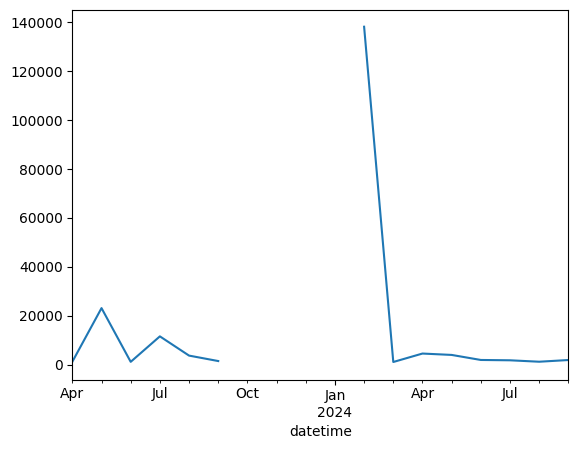

In [ ]:
short_sa_forest_fires_tovima_df['text'].str.len().resample('Me').mean().plot()

<ipython-input-57-1307691640>:1: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_sa_forest_fires_tovima_df['text'].resample('Me').count().plot(kind='barh')


<Axes: ylabel='datetime'>

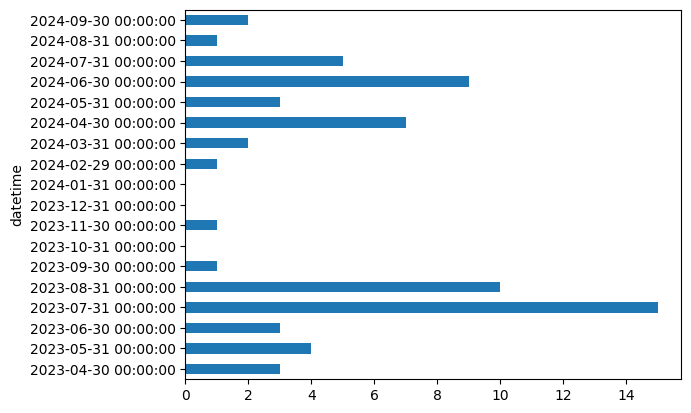

In [ ]:
short_sa_forest_fires_tovima_df['text'].resample('Me').count().plot(kind='barh')

**Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά μήνα**

<Axes: xlabel='datetime'>

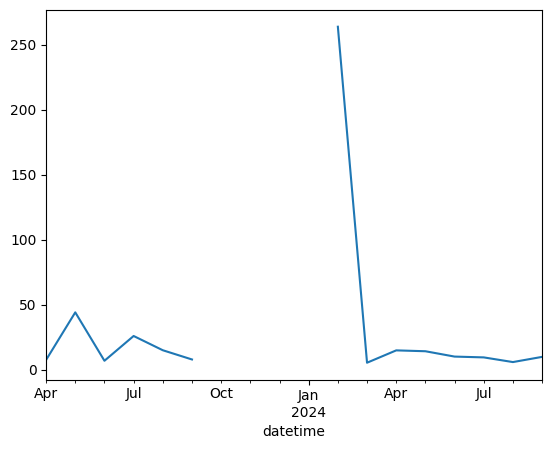

In [ ]:
short_sa_forest_fires_tovima_df['fear'].resample('ME').mean().plot()

In [ ]:
short_sa_forest_fires_tovima_df.sort_index().head(10)

,index,date_dt,time_dt,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,
2023-04-19 15:44:00,42,2023-04-19,15:44:00,Φωτιά σε δασική έκταση στα Μέγαρα – Επιχειρούν...,0,0,0,0,0,0,3,0,0,9
2023-04-27 15:20:00,66,2023-04-27,15:20:00,Πυρκαγιά σε δασική έκταση στα Μέθανα Στο σημεί...,0,2,0,0,0,4,4,0,4,6
2023-04-30 14:50:00,54,2023-04-30,14:50:00,Δασική πυρκαγιά στο Μήλεσι Ωρωπού Η πυρκαγιά ε...,3,6,0,0,0,2,2,0,5,8
2023-05-14 16:03:00,65,2023-05-14,16:03:00,Ρόδος: Πυρκαγιά κοντά σε δασική έκταση Επί ποδ...,7,12,0,0,0,0,7,7,10,22
2023-05-25 10:41:00,51,2023-05-25,10:41:00,Μελέτη: Πώς οι εκπομπές διοξειδίου συνδέονται ...,71,350,83,56,31,212,139,70,237,138
2023-05-27 18:19:00,64,2023-05-27,18:19:00,Πυρκαγιά σε αγροτοδασική έκταση στα Καλύβια Θο...,0,4,0,5,0,1,2,0,0,5
2023-05-29 23:17:00,63,2023-05-29,23:17:00,Καναδάς: Περίπου 18.000 άνθρωποι εγκατέλειψαν ...,9,18,0,1,16,9,0,10,30,12
2023-06-15 15:33:00,41,2023-06-15,15:33:00,Φωτιά σε δασική έκταση στα Μέθανα Για την κατά...,1,3,0,0,0,7,2,0,7,7
2023-06-26 15:14:00,40,2023-06-26,15:14:00,Φωτιά σε δασική έκταση στη Ζάκυνθο – Επιχειρού...,0,0,0,0,0,0,2,0,0,8


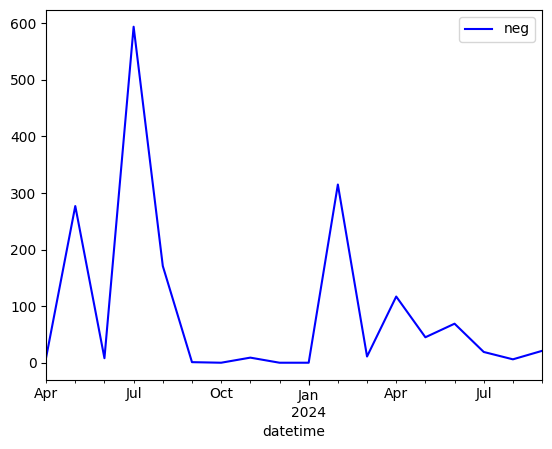

In [ ]:
short_sa_forest_fires_tovima_df['negative'].resample('ME').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='datetime'>

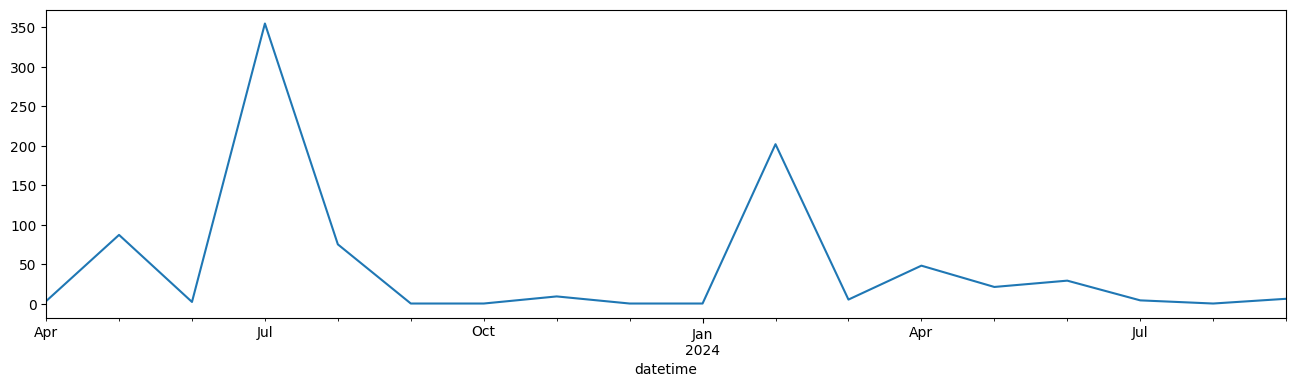

In [ ]:
short_sa_forest_fires_tovima_df['anger'].resample('ME').sum().plot(figsize=(16,4))

Μπορούμε να εμφανίσουμε πολλά linecharts στο ίδιο γράφημα

<Axes: xlabel='datetime'>

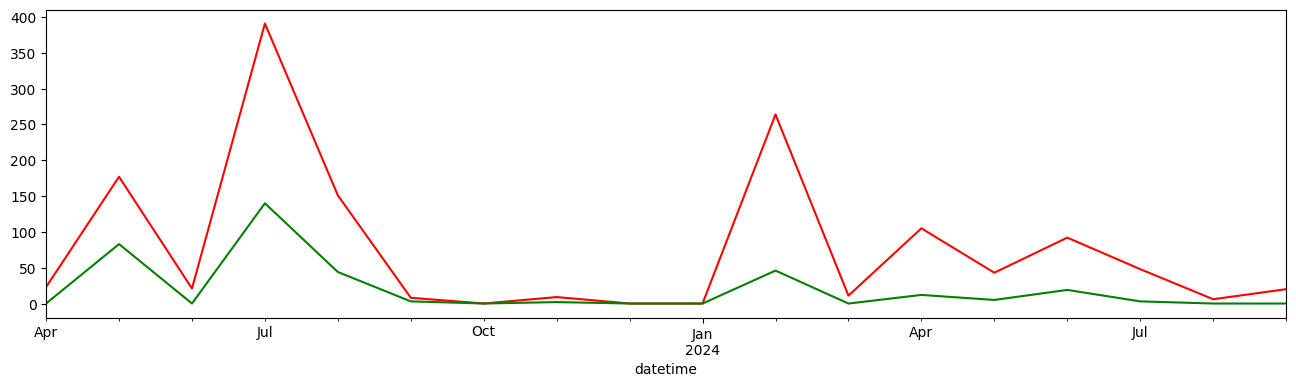

In [ ]:
ax = short_sa_forest_fires_tovima_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_tovima_df['joy'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='datetime'>

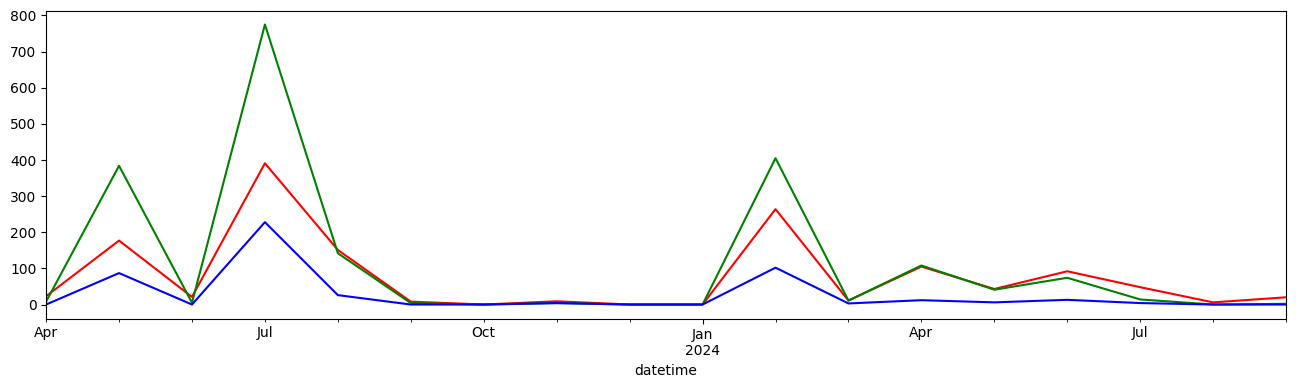

In [ ]:
ax = short_sa_forest_fires_tovima_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_tovima_df['positive'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_sa_forest_fires_tovima_df['sadness'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
#plt.style.use('classic')
#plt.style.use('ggplot')
# plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

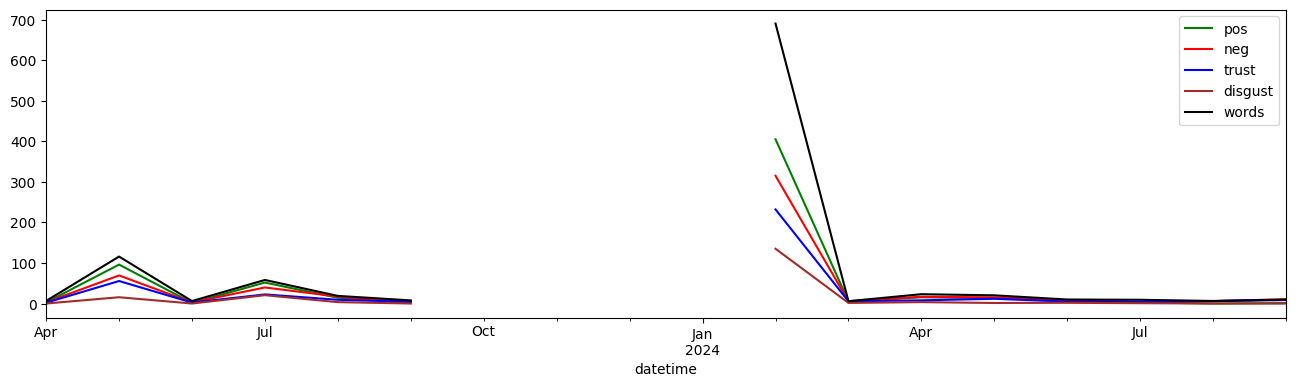

In [ ]:
ax = short_sa_forest_fires_tovima_df['positive'].resample('ME').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_sa_forest_fires_tovima_df['negative'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_sa_forest_fires_tovima_df['trust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_sa_forest_fires_tovima_df['disgust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_sa_forest_fires_tovima_df['text'].str.len().resample('ME').mean()/200).plot(figsize=(16,4), ax = ax,
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='datetime'>

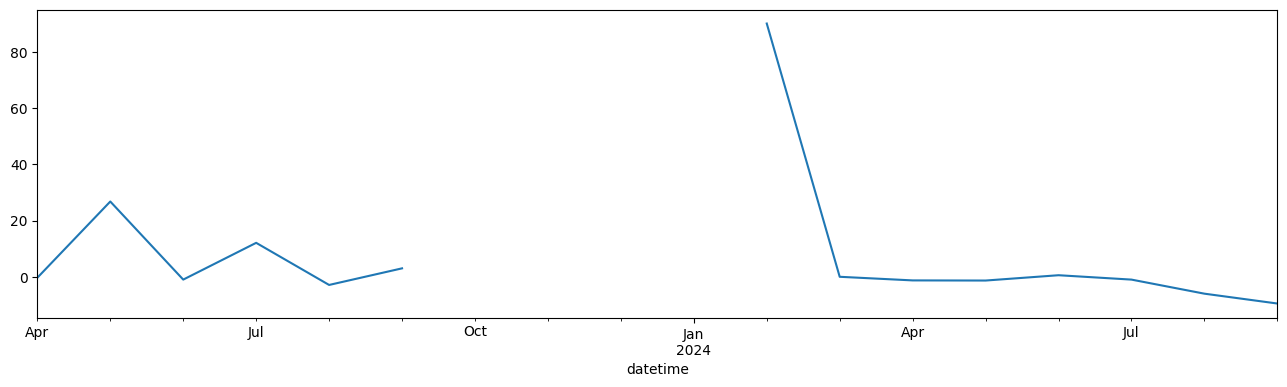

In [ ]:
short_sa_forest_fires_tovima_df['pos/neg'] = short_sa_forest_fires_tovima_df['positive'] - short_sa_forest_fires_tovima_df['negative']
short_sa_forest_fires_tovima_df['pos/neg'].resample('ME').mean().plot(figsize=(16,4))

In [ ]:
#plt.style.use('grayscale')
# plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='datetime'>

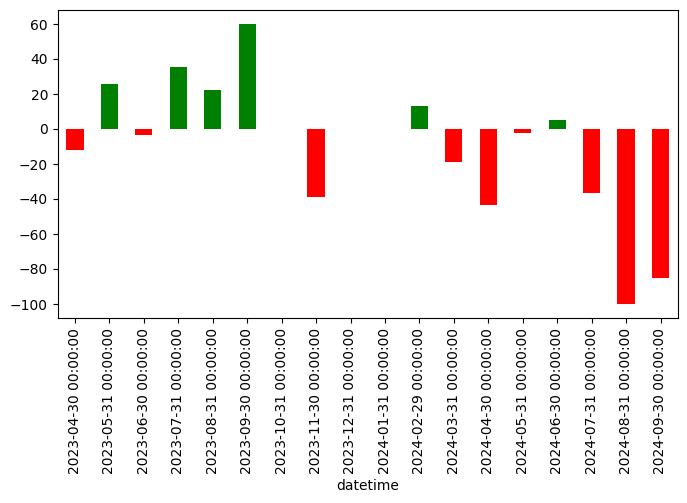

In [ ]:
short_sa_forest_fires_tovima_df['(-)αρνητικότητα | θετικότητα(+)'] = short_sa_forest_fires_tovima_df.positive*100//short_sa_forest_fires_tovima_df[['positive','negative']].sum(
        axis=1) - short_sa_forest_fires_tovima_df.negative*100//short_sa_forest_fires_tovima_df[['positive','negative']].sum(axis=1)

short_sa_forest_fires_tovima_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean().plot(kind='bar',
                                                                               color=(short_sa_forest_fires_tovima_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [ ]:
short_sa_forest_fires_tovima_df[(short_sa_forest_fires_tovima_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_tovima_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_sa_forest_fires_tovima_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_tovima_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
datetime,,,,
2024-09-28 16:08:00,0,0,9,-100.0
2024-08-18 17:08:00,2,0,6,-100.0
2024-07-15 16:25:00,4,10,0,100.0
2024-07-13 21:08:00,5,0,7,-100.0
2024-07-07 13:12:00,6,0,1,-100.0
2024-06-23 18:45:00,13,0,6,-100.0
2024-04-10 17:24:00,17,0,1,-100.0
2023-08-17 21:16:00,24,1,0,100.0
2023-08-09 12:46:00,27,3,0,100.0
